In [28]:
import zipfile
import os

# Path to dataset
zip_file_path = r'C:\Users\yash2\Downloads\iris.zip'
extraction_dir = r'C:\Users\yash2\Downloads\iris_data'

# Extracting the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

# Listing the contents of the extracted directory
extracted_files = os.listdir(extraction_dir)
extracted_files


['bezdekIris.data', 'Index', 'iris.data', 'iris.names']

In [8]:
import pandas as pd

# Defining the path to the iris.data file
iris_data_path = os.path.join(extraction_dir, 'iris.data')

# Loading the dataset into a Pandas DataFrame
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(iris_data_path, header=None, names=column_names)

# Displaying the first 5 rows of the DataFrame
df.head()




,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# Displaying summary statistics of the dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# Checking for missing values
df.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
# Ensuring all column names are in lowercase
df.columns = df.columns.str.lower()
df.columns


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [13]:
# Adding new column sepal_area
df['sepal_area'] = df['sepal_length'] * df['sepal_width']

# Adding new column petal_area
df['petal_area'] = df['petal_length'] * df['petal_width']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,18.00,0.28


In [15]:
# Normalizing the values
for column in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    min_value = df[column].min()
    max_value = df[column].max()
    df[column] = (df[column] - min_value) / (max_value - min_value)

df.head()


,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa,17.85,0.28
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa,14.70,0.28
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa,15.04,0.26
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa,14.26,0.30
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa,18.00,0.28


In [16]:
# Grouping by species and calculate mean, median, and standard deviation
grouped_df = df.groupby('species').agg(['mean', 'median', 'std'])
grouped_df


sepal_length                     sepal_width            \
                        mean    median       std        mean    median   
species                                                                  
Iris-setosa         0.196111  0.194444  0.097914    0.590833  0.583333   
Iris-versicolor     0.454444  0.444444  0.143381    0.320833  0.333333   
Iris-virginica      0.635556  0.611111  0.176633    0.405833  0.416667   

                          petal_length                     petal_width  \
                      std         mean    median       std        mean   
species                                                                  
Iris-setosa      0.158760     0.078644  0.084746  0.029409    0.060000   
Iris-versicolor  0.130749     0.552542  0.567797  0.079646    0.510833   
Iris-virginica   0.134374     0.771525  0.771186  0.093541    0.802500   

                                    sepal_area                   petal_area  \
                   median       std       mean  median       std       mean   
species                                                                       
Iris-setosa      0.041667  0.044671    17.2088  17.000  2.947688     0.3628   
Iris-versicolor  0.500000  0.082397    16.5262  16.385  2.866882     5.7204   
Iris-virginica   0.791667  0.114438    19.6846  20.060  3.458783    11.2962   

                                   
                 median       std  
species                            
Iris-setosa       0.300  0.183248  
Iris-versicolor   5.615  1.368403  
Iris-virginica   11.445  2.157412

In [17]:
# Creating a pivot table for sepal_area and petal_area
pivot_table = df.pivot_table(values=['sepal_area', 'petal_area'], index='species', aggfunc='mean')
pivot_table


,petal_area,sepal_area
species,,
Iris-setosa,0.3628,17.2088
Iris-versicolor,5.7204,16.5262
Iris-virginica,11.2962,19.6846


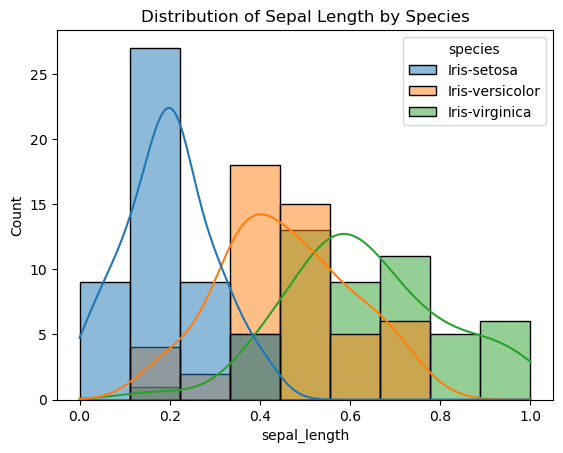

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of sepal_length for each species
sns.histplot(data=df, x='sepal_length', hue='species', kde=True)
plt.title('Distribution of Sepal Length by Species')
plt.show()


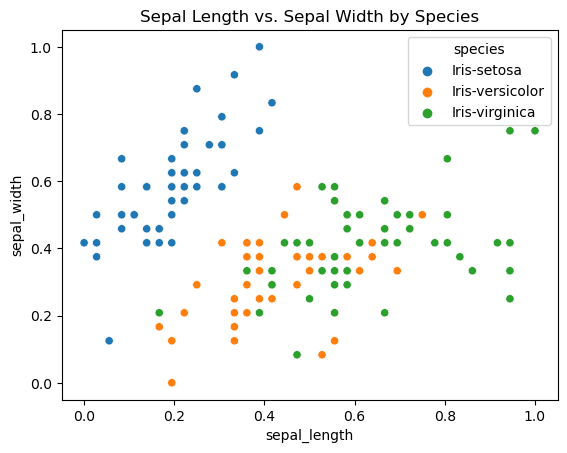

In [19]:
# Creating scatter plot of sepal_length vs. sepal_width colored by species
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')
plt.title('Sepal Length vs. Sepal Width by Species')
plt.show()


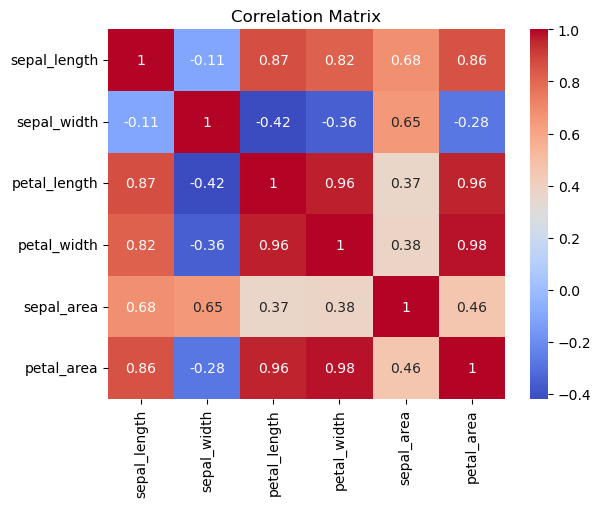

In [22]:
# Computing the correlation matrix for numeric columns only
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Creating a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [23]:
# Identifying top 10 rows with highest sepal_area
top_10_sepal_area = df.nlargest(10, 'sepal_area')
top_10_sepal_area


,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
131,1.000000,0.750000,0.915254,0.791667,Iris-virginica,30.02,12.80
117,0.944444,0.750000,0.966102,0.875000,Iris-virginica,29.26,14.74
109,0.805556,0.666667,0.864407,1.000000,Iris-virginica,25.92,15.25
15,0.388889,1.000000,0.084746,0.125000,Iris-setosa,25.08,0.60
14,0.416667,0.833333,0.033898,0.041667,Iris-setosa,23.20,0.24
33,0.333333,0.916667,0.067797,0.041667,Iris-setosa,23.10,0.28
135,0.944444,0.416667,0.864407,0.916667,Iris-virginica,23.10,14.03
125,0.805556,0.500000,0.847458,0.708333,Iris-virginica,23.04,10.80
105,0.916667,0.416667,0.949153,0.833333,Iris-virginica,22.80,13.86
50,0.750000,0.500000,0.627119,0.541667,Iris-versicolor,22.40,6.58


In [24]:
# Filtering dataset to only include rows where petal_length is greater than the median petal_length
filtered_df = df[df['petal_length'] > df['petal_length'].median()]
filtered_df


,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
50,0.750000,0.500000,0.627119,0.541667,Iris-versicolor,22.40,6.58
51,0.583333,0.500000,0.593220,0.583333,Iris-versicolor,20.48,6.75
52,0.722222,0.458333,0.661017,0.583333,Iris-versicolor,21.39,7.35
54,0.611111,0.333333,0.610169,0.583333,Iris-versicolor,18.20,6.90
55,0.388889,0.333333,0.593220,0.500000,Iris-versicolor,15.96,5.85
...,...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,Iris-virginica,20.10,11.96
146,0.555556,0.208333,0.677966,0.750000,Iris-virginica,15.75,9.50
147,0.611111,0.416667,0.711864,0.791667,Iris-virginica,19.50,10.40
148,0.527778,0.583333,0.745763,0.916667,Iris-virginica,21.08,12.42


In [26]:
# Calculating the proportion of each species(* Additional)
species_proportion = df['species'].value_counts(normalize=True) * 100
species_proportion


species
Iris-setosa        33.333333
Iris-versicolor    33.333333
Iris-virginica     33.333333
Name: proportion, dtype: float64

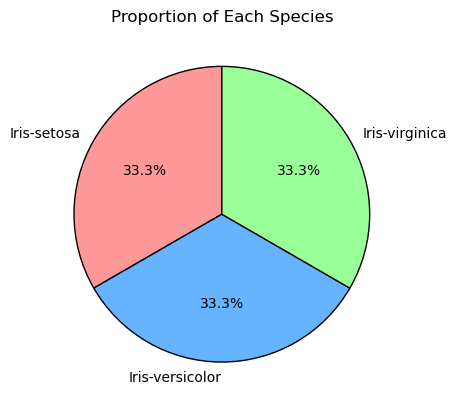

In [27]:
# Pie chart of species proportions
species_proportion.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'], 
                            wedgeprops={'edgecolor': 'black'})
plt.title('Proportion of Each Species')
plt.ylabel('')  # Hides the y-label
plt.show()
